In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_csv('C:\\Users\\karti\\OneDrive\\Desktop\\Analytics work\Flipproj1.csv')

In [151]:
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 37 columns]

In [152]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [153]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 36 columns]

In [154]:
df.tail()

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[5 rows x 36 columns]

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [156]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [157]:
df.drop('msisdn',axis=1,inplace=True)

In [158]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 35 columns]

The graph confirms that the data is imbalanced


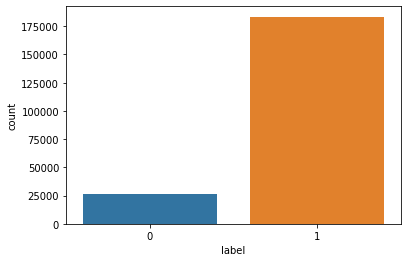

In [159]:
sns.countplot("label",data=df)
print('The graph confirms that the data is imbalanced')

In [160]:
Pyback_success = df[df["label"]==1]
Payback_failure= df[df["label"]==0]

In [161]:
Pyback_success

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
5           1   568.0   2257.362667   2261.460000    368.13    380.13   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
5                     2.0                0.0              1539              4   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
5       ...              6.0                 0.0          3.0            18   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
5                     6                 0.0  11.000000   8.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
5       02-07-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[183431 rows x 35 c

In [162]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

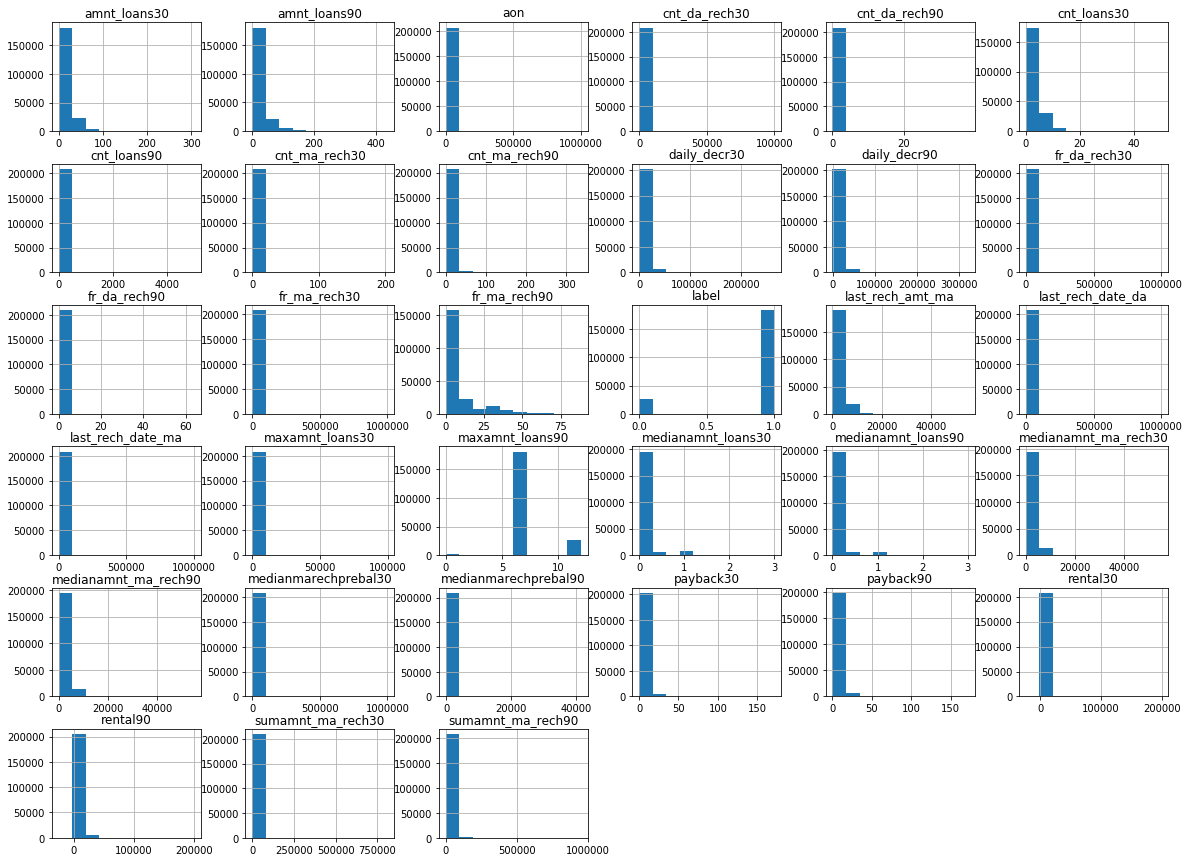

In [163]:
df.hist(figsize = (20,15))
plt.show()

In [164]:
print(Pyback_success.shape,Payback_failure.shape)

(183431, 35) (26162, 35)


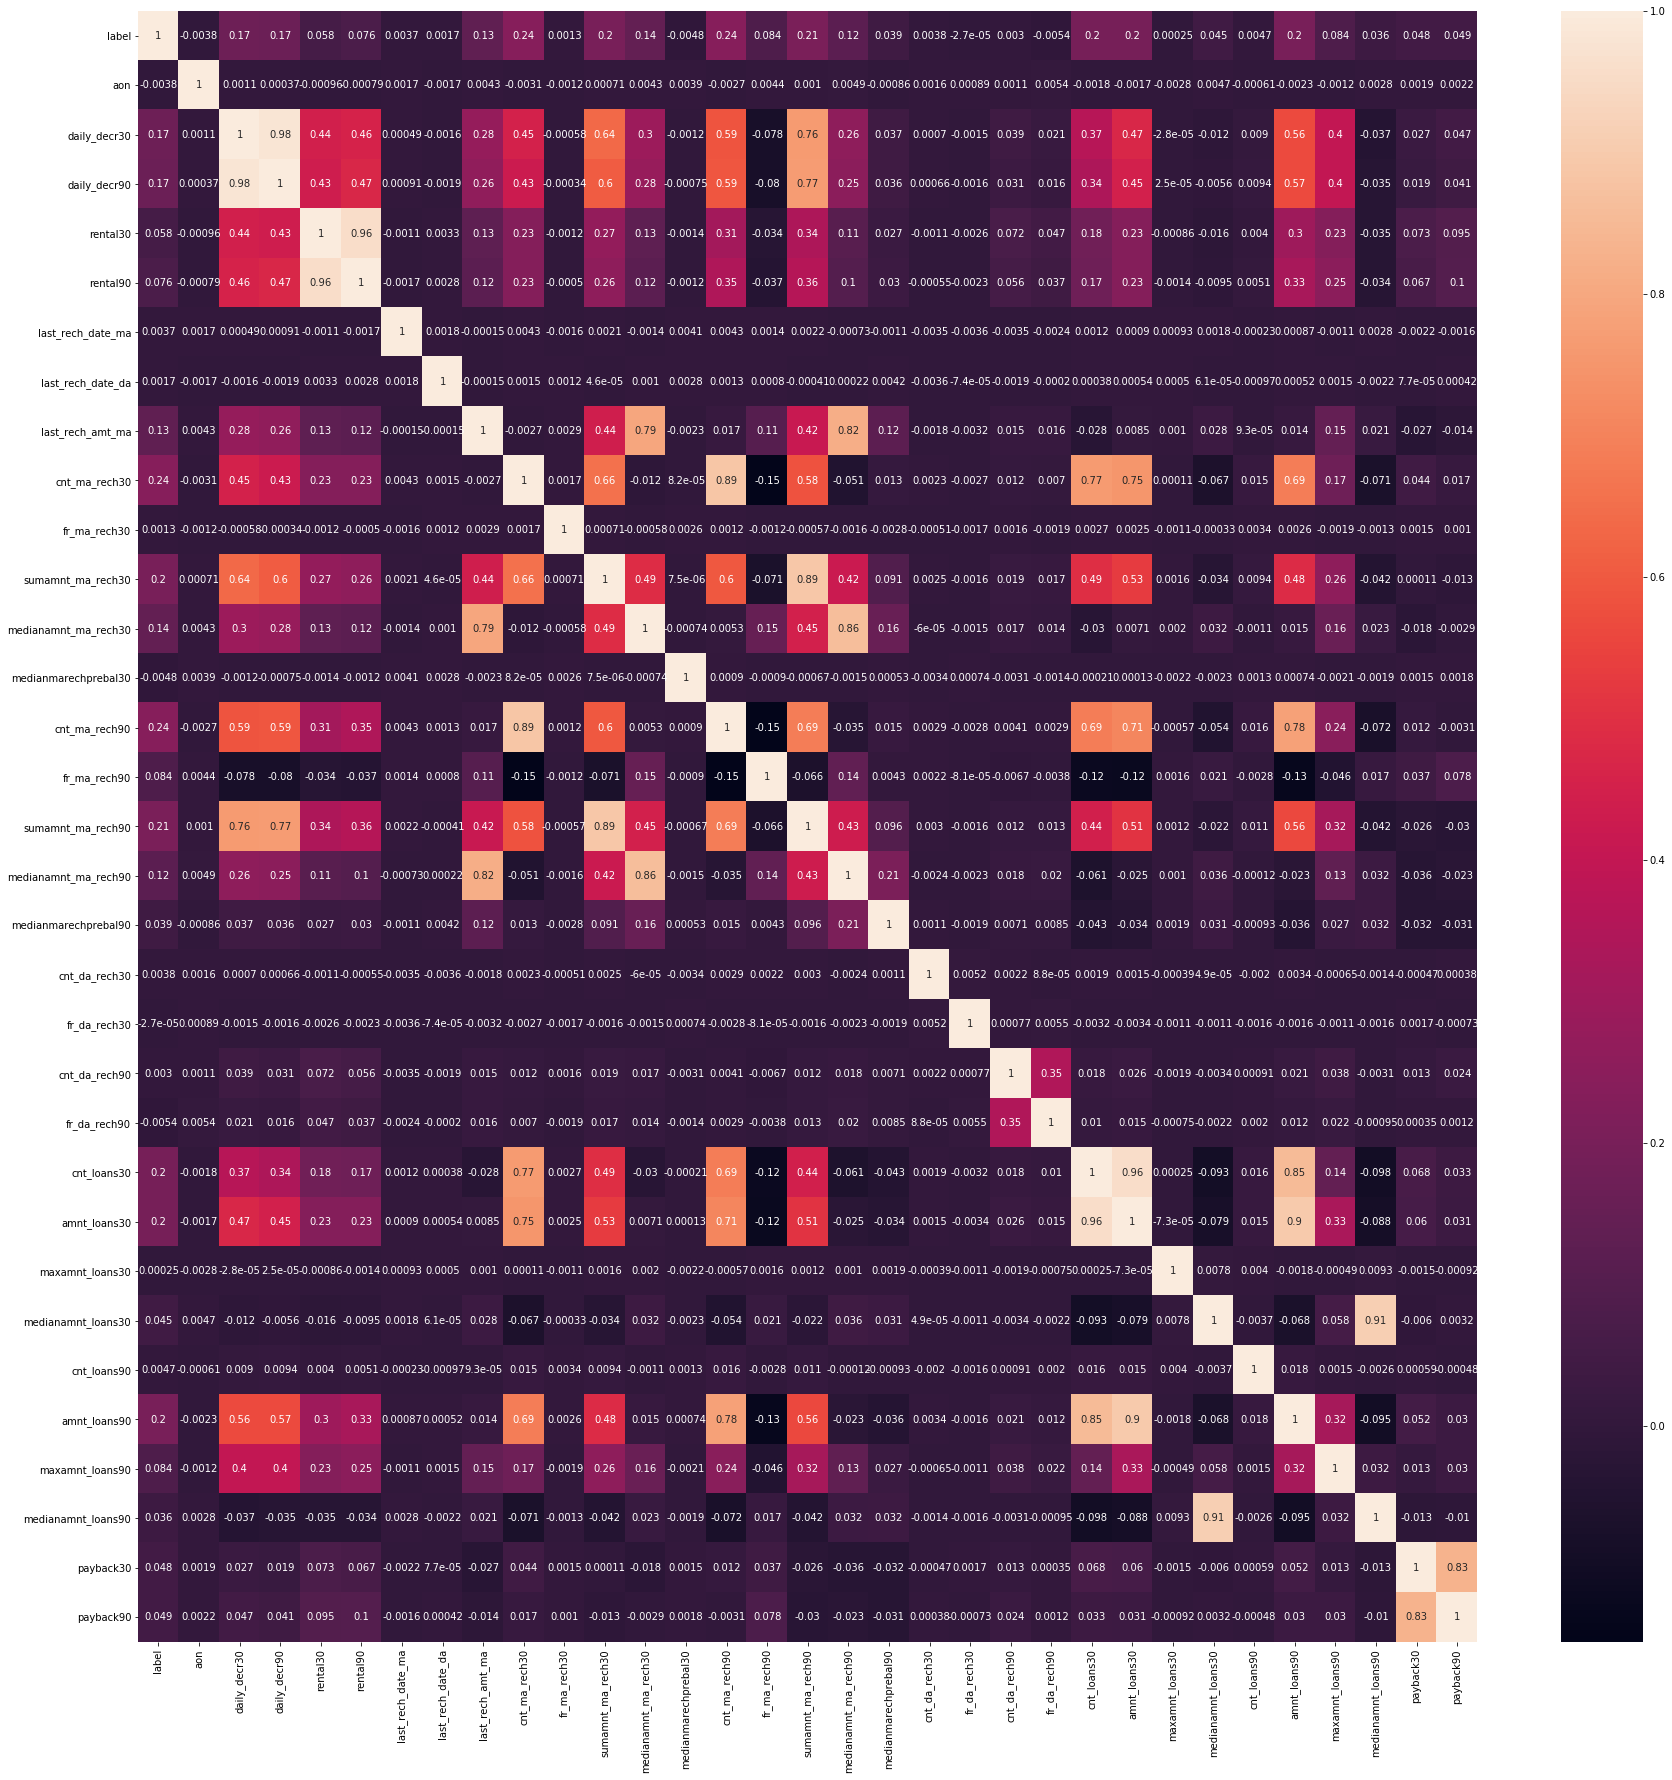

In [165]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [166]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 35 columns]

In [167]:
df.tail()

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[5 rows x 35 columns]

In [168]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 35 columns]

In [169]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'pdate'],
      dtype='object')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [171]:
import datetime as dt

In [172]:
df['pdate']=pd.to_datetime(df['pdate'])

In [173]:
df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Day']=df['pdate'].dt.day

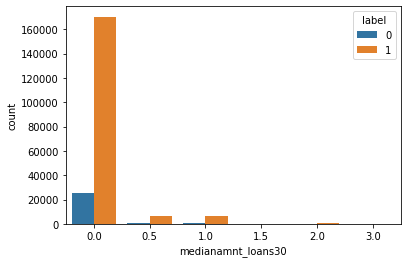

In [174]:
sns.countplot('medianamnt_loans30',hue='label',data=df)

(array([2.02303e+05, 6.31800e+03, 7.34000e+02, 1.75000e+02, 4.10000e+01,
        1.00000e+01, 9.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-9.30126667e+01,  2.65088886e+04,  5.31107899e+04,  7.97126911e+04,
         1.06314592e+05,  1.32916494e+05,  1.59518395e+05,  1.86120296e+05,
         2.12722197e+05,  2.39324099e+05,  2.65926000e+05]),
 <a list of 10 Patch objects>)

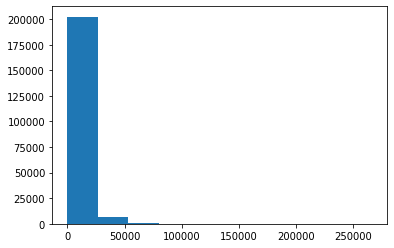

In [175]:
plt.hist(df['daily_decr30'])

(array([2.0275e+05, 5.8770e+03, 7.3600e+02, 1.5800e+02, 4.3000e+01,
        1.7000e+01, 7.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-9.30126667e+01,  3.19792886e+04,  6.40515899e+04,  9.61238911e+04,
         1.28196192e+05,  1.60268494e+05,  1.92340795e+05,  2.24413096e+05,
         2.56485397e+05,  2.88557699e+05,  3.20630000e+05]),
 <a list of 10 Patch objects>)

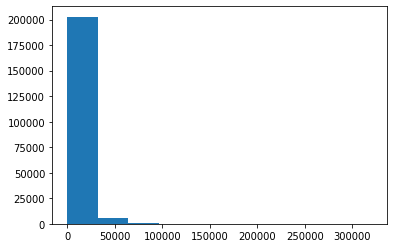

In [176]:
plt.hist(df['daily_decr90'])

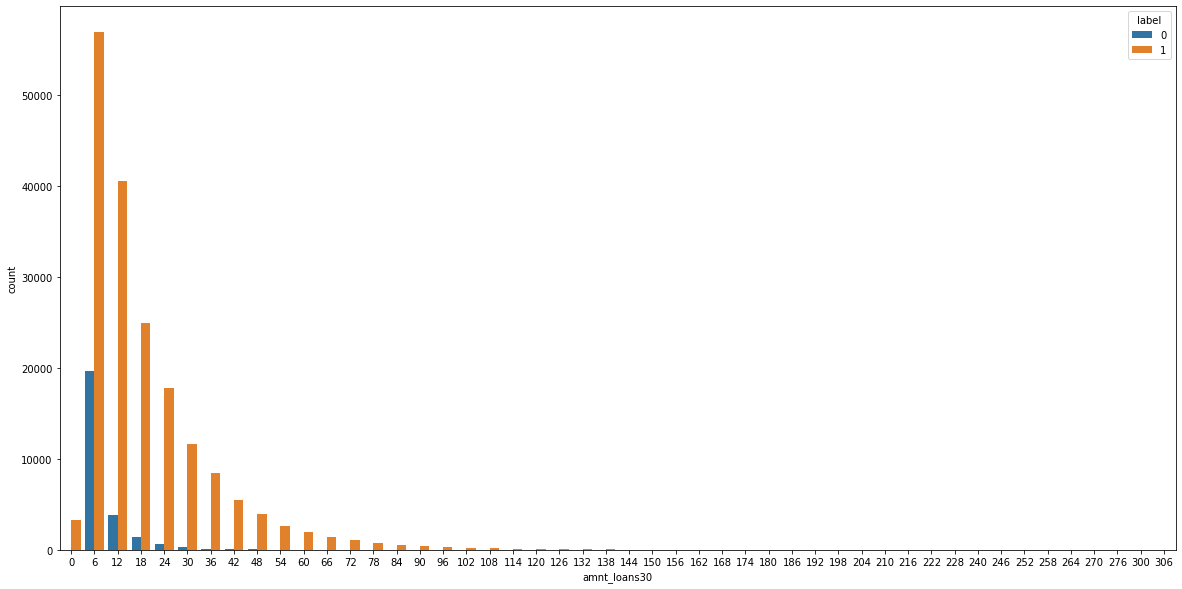

In [177]:
plt.figure(figsize=(20,10))
sns.countplot('amnt_loans30',hue='label',data=df)

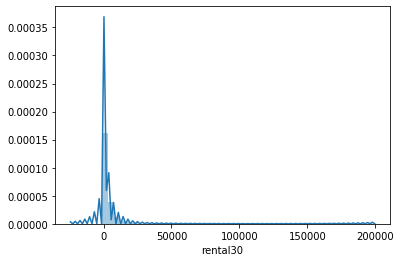

In [178]:
sns.distplot(df['rental30'])

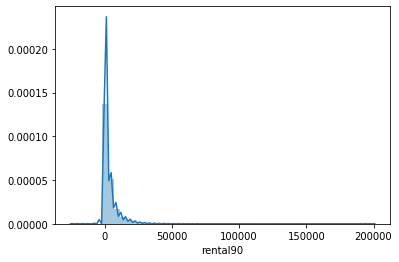

In [179]:
sns.distplot(df['rental90'])

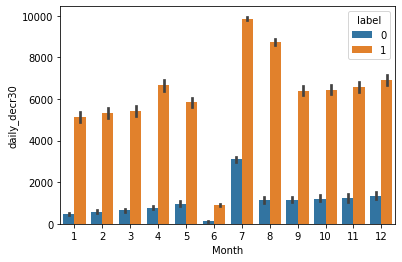

In [180]:
sns.barplot(x=df['Month'],y=df['daily_decr30'],hue=df['label'])

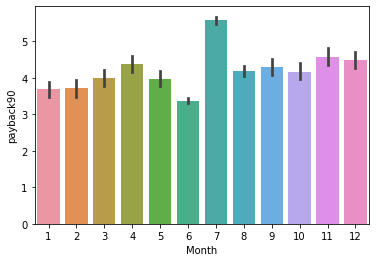

In [181]:
sns.barplot(x=df['Month'],y=df['payback90'])

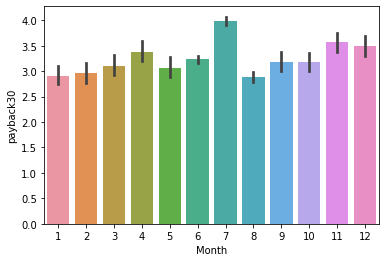

In [182]:
sns.barplot(x=df['Month'],y=df['payback30'])

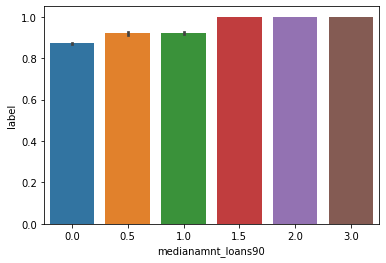

In [183]:
sns.barplot(x='medianamnt_loans90',y='label',data=df)
plt.show()

In [184]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [185]:
df.drop('pcircle',axis=1,inplace=True)

In [186]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90      pdate  Year  Month  Day  
0  29.000000 2016-07-20  2016      7   20  
1   0.000000 2016-10-08  2016     10    8  
2   0.000000 2016-08-19  2016      8   19  
3   0.000000 2016-06-06  2016      6    6  
4   2.333333 2016-06-22  2016      6   22  

[5 rows x 37 columns]

In [187]:
df.drop('pdate',axis=1,inplace=True)

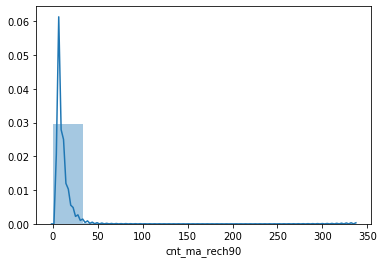

In [188]:
sns.distplot(df['cnt_ma_rech90'],bins=10)

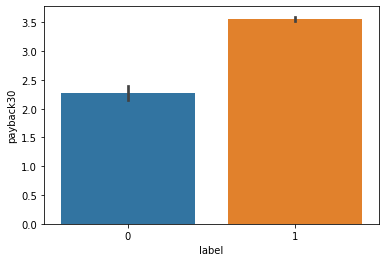

In [189]:
sns.barplot(x=df['label'],y=df['payback30'],data=df)

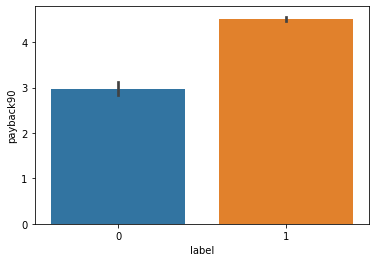

In [190]:

sns.barplot(x=df['label'],y=df['payback90'],data=df)

In [191]:

df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

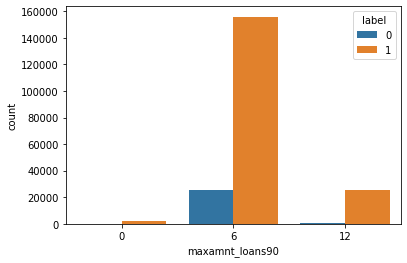

In [192]:
#count for maximum loan amount in 90 days
sns.countplot(x='maxamnt_loans90',hue='label', data=df)

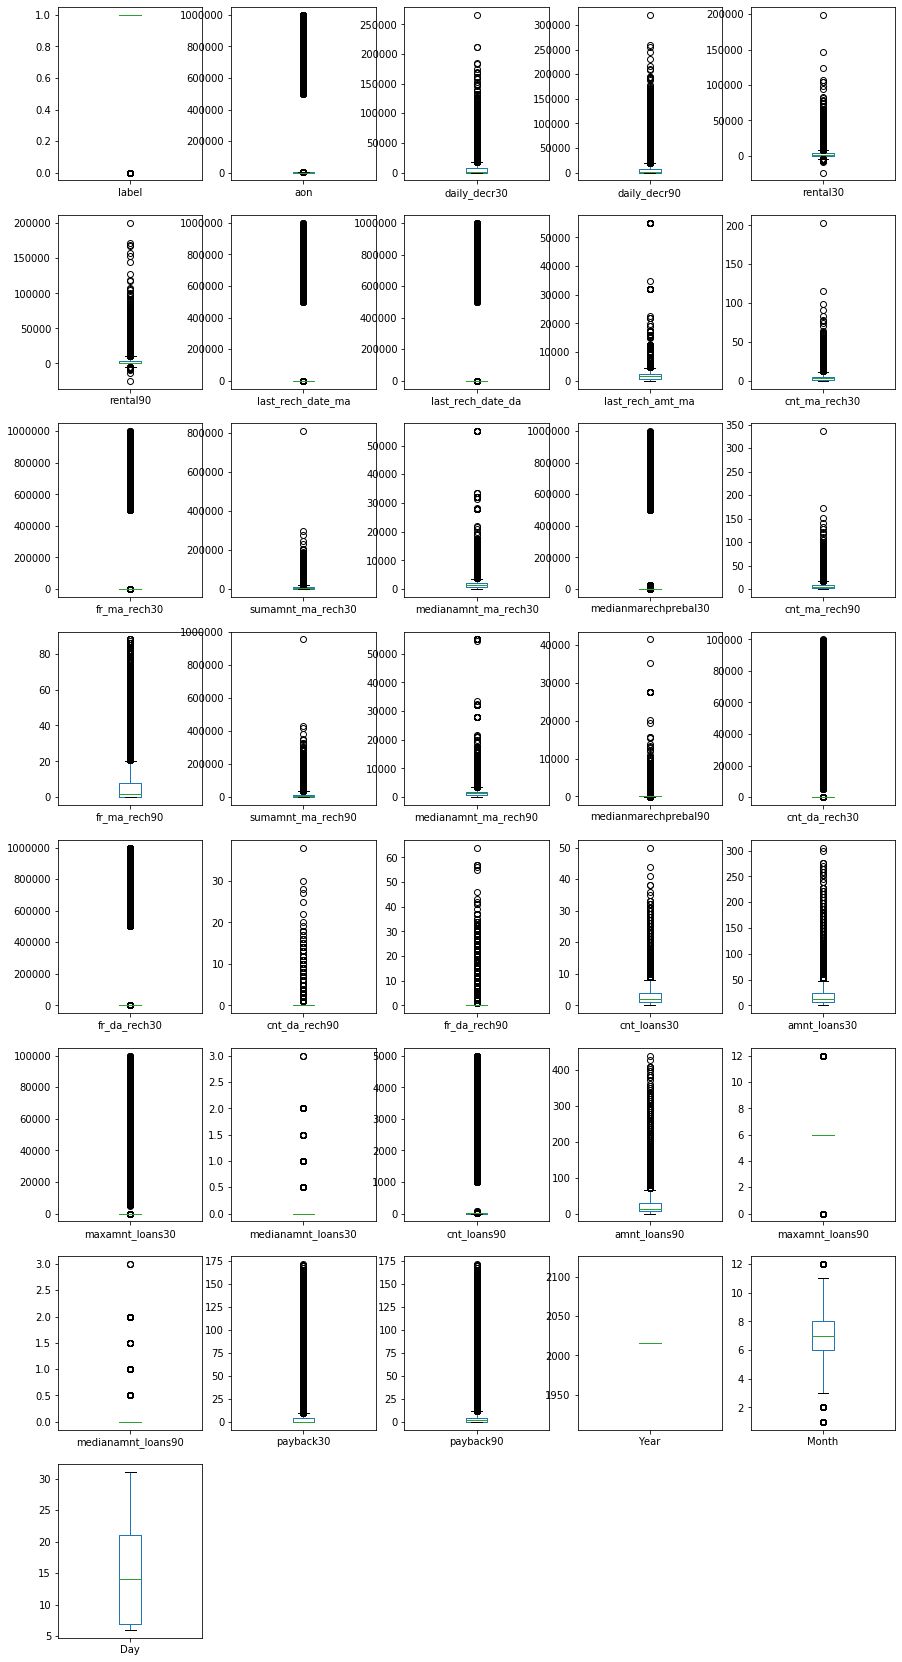

In [193]:

df.plot(kind='box',subplots=True,figsize=(15,30), layout=(8,5))
plt.show()

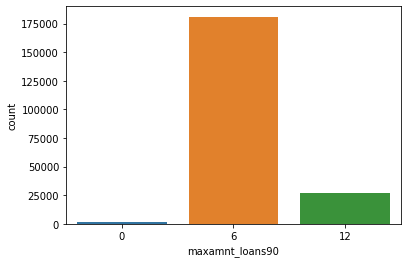

In [194]:
sns.countplot(df.maxamnt_loans90)

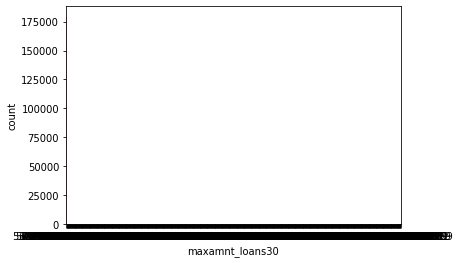

In [195]:
sns.countplot(df.maxamnt_loans30)

In [196]:
df.drop(['Year','Month'],axis=1,inplace=True)

In [197]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)

(209593, 34)


In [198]:
threshold=3
print(np.where(zscore>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [199]:
DF1=df[(zscore<3).all(axis=1)]
DF1.shape


(161465, 34)

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [201]:
from sklearn.utils import resample

In [202]:
majority=DF1[DF1.label==1]
minority=DF1[DF1.label==0]

In [203]:
minsampled= resample(minority,
                    replace=True,
                    n_samples=len(majority),
                    random_state=1234)

In [204]:
DF2=pd.concat([majority,minsampled])

In [205]:
DF2.shape

(278130, 34)

In [206]:
DF2.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   
5      1  568.0   2257.362667   2261.460000    368.13    380.13   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   
5                2.0                0.0              1539              4  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   
5            18              6.0                 0.0          3.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   
5            18                6                 0.0  11.000000   8.333333   

   Day  
1    8  
2   19  
3    6  
4   22  
5    7  

[5 rows x 34 columns]

In [207]:
DF2['label'].unique()

array([1, 0], dtype=int64)

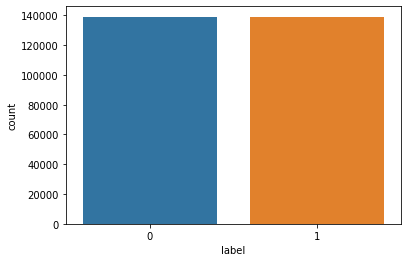

In [208]:
sns.countplot(DF2['label'])

In [209]:
DF2.shape

(278130, 34)

In [210]:
x=DF2.drop(columns=['label'])
y=DF2[['label']]

In [211]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [212]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)


In [217]:
print(x.shape)
print(y.shape)

(278130, 10)
(278130, 1)


In [218]:

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2, shuffle = True, stratify = y)

In [220]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [221]:
DT=DecisionTreeClassifier(random_state=6)
LR=LogisticRegression()
RFC=RandomForestClassifier()

In [222]:
models = []

In [223]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [224]:
models.append(('RandomForestClassifier',RFC))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))


In [225]:
Model = []
score = []
cvs=[]
rocscore=[]

# DECISION TREE CLASSIFIER

In [228]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
DT.score(X_train,Y_train)
preddt=DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9338199163460732
[[41473   247]
 [ 5275 36444]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     41720
           1       0.99      0.87      0.93     41719

    accuracy                           0.93     83439
   macro avg       0.94      0.93      0.93     83439
weighted avg       0.94      0.93      0.93     83439



# RANDOM FOREST CLASSIFIER


In [230]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
RFC.score(X_train,Y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9581970061961433
[[41510   210]
 [ 3278 38441]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     41720
           1       0.99      0.92      0.96     41719

    accuracy                           0.96     83439
   macro avg       0.96      0.96      0.96     83439
weighted avg       0.96      0.96      0.96     83439



# LOGISTIC REGRESSION


In [231]:

LR=LogisticRegression()
LR.fit(X_train,Y_train)
LR.score(X_train,Y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7617660806097868
[[33483  8237]
 [11641 30078]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     41720
           1       0.79      0.72      0.75     41719

    accuracy                           0.76     83439
   macro avg       0.76      0.76      0.76     83439
weighted avg       0.76      0.76      0.76     83439



In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
dtscores=cross_val_score(DT,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.94117859 0.94033366 0.93925502 0.94076511 0.93932693]
0.9401718620788839 0.0007676077036426436


In [235]:
lrscores=cross_val_score(LR,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.76095711 0.76131665 0.76325819 0.76054363 0.76325819]
0.7618667529572501 0.0011621453064386436


In [236]:
rfcscores=cross_val_score(RFC,x,y,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.96384784 0.96456693 0.96228382 0.96284112 0.96408154]
0.9635242512494158 0.0008375911404731686


# Out of the three models ,Random Forest Classifier gives us the highest accuracy so we will go with that model

In [248]:
import pickle
filename='RFmicro.pkl'
pickle.dump(RFC, open(filename,'wb'))


In [249]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

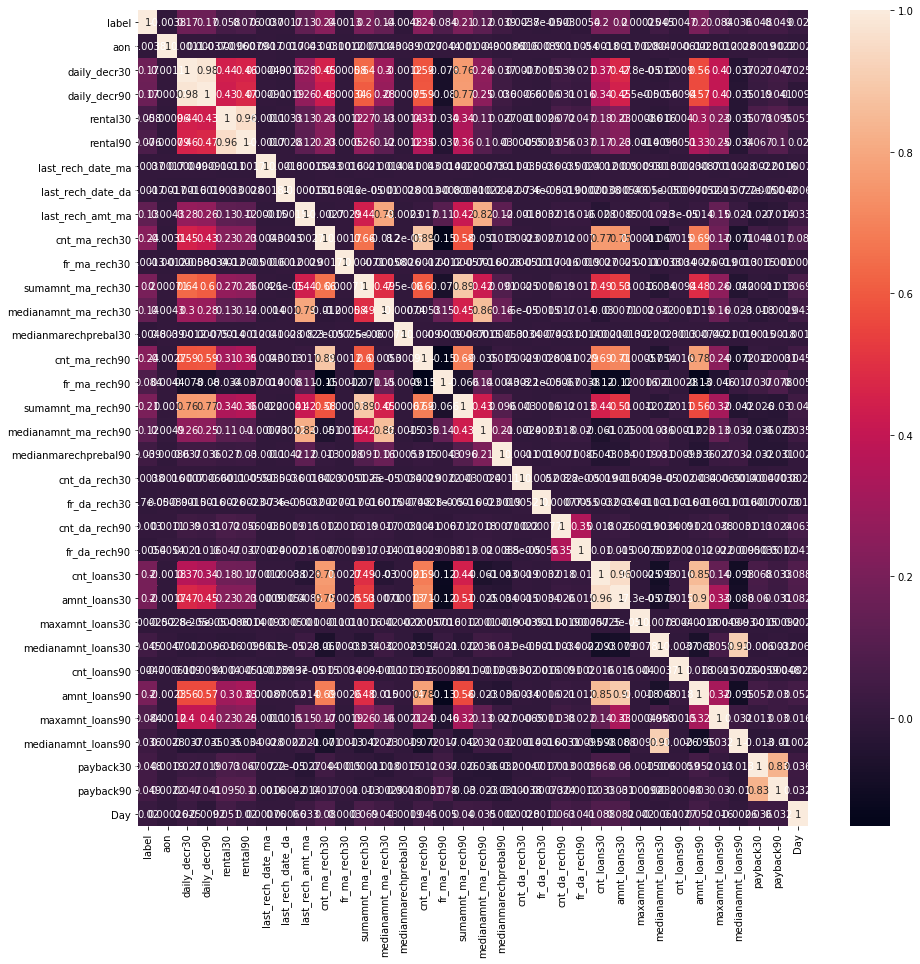